In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('output.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.shape

(4600, 18)

In [6]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country']

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [9]:
df.drop(columns=['date','waterfront','yr_built','yr_renovated','statezip','country'],inplace=True)

In [10]:
df.shape

(4600, 12)

In [11]:
df.isna().sum().sum()

0

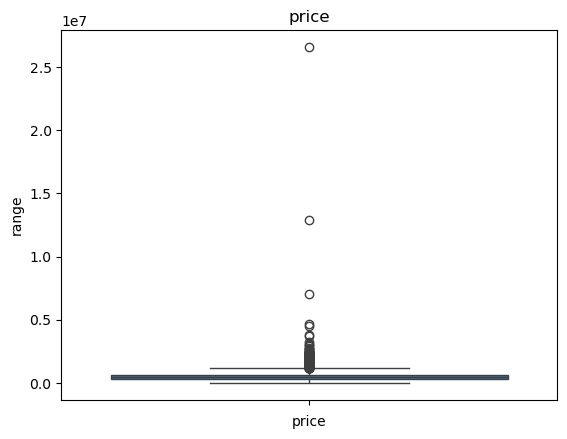

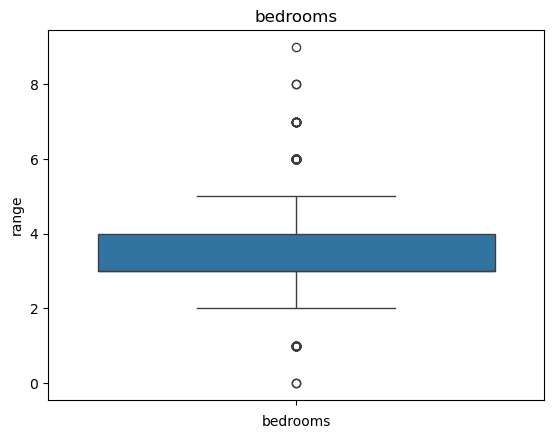

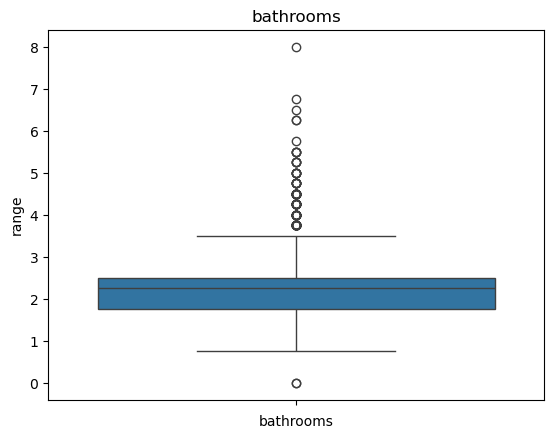

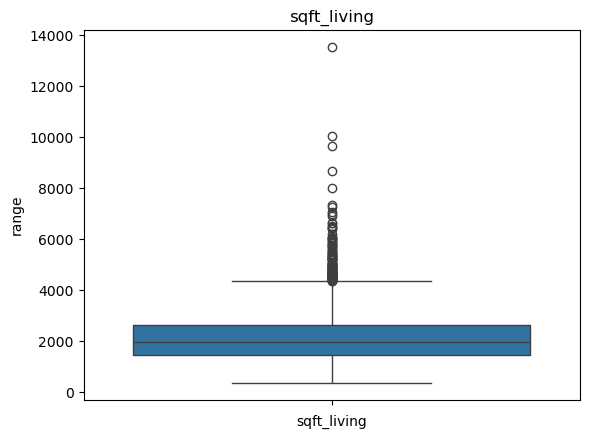

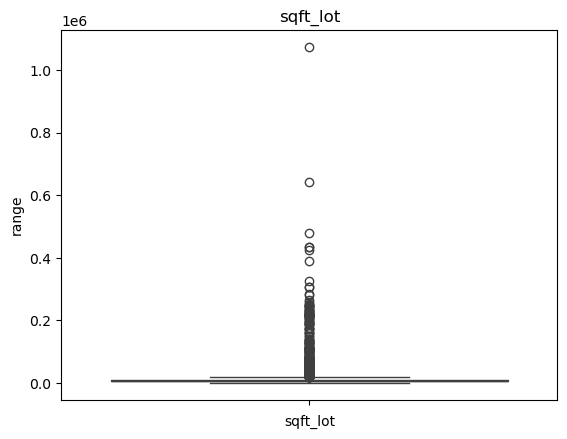

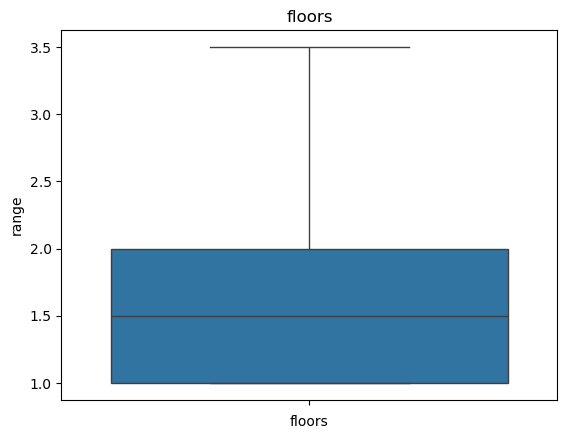

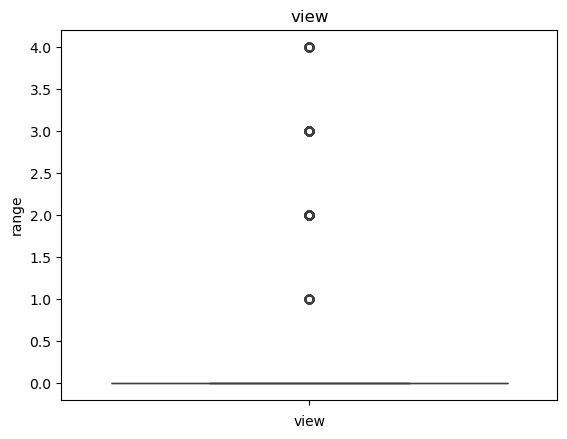

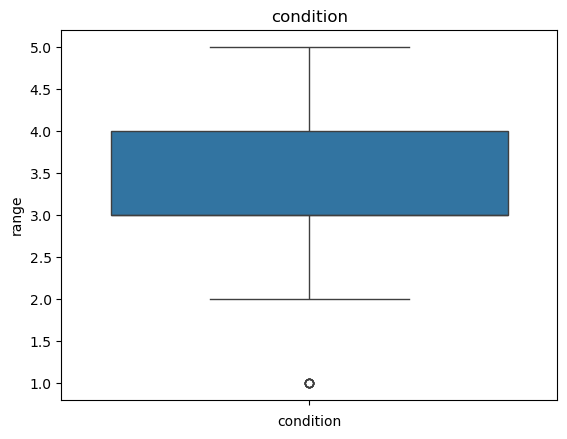

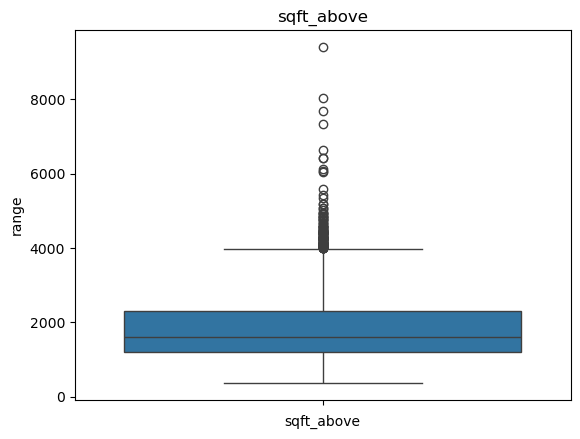

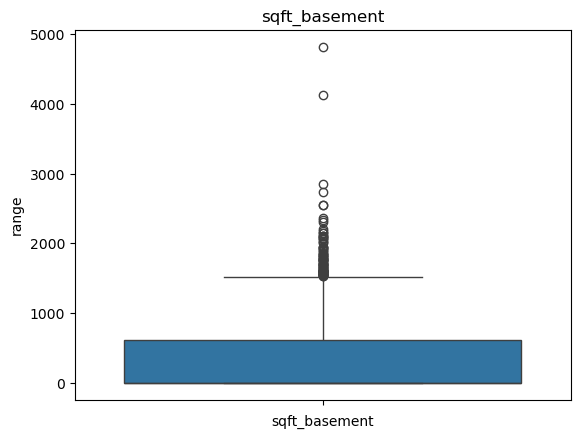

In [12]:
df.columns
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('range')
        plt.title(i)
        plt.show()

In [14]:
col=['price', 'bedrooms','bathrooms', 'sqft_living','sqft_lot','view','condition','sqft_above','sqft_basement']
for i in col:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LF=Q1-1.5*IQR
    UF=Q3+1.5*IQR
    df=df[(df[i]>=LF) & (df[i]<=UF)]

In [15]:
df.shape

(3226, 12)

In [20]:
df=pd.get_dummies(df,drop_first=True)

In [21]:
df.shape

(3226, 3220)

In [22]:
X=df.drop('price',axis=1)
y=df['price']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.score(X_test,y_test)
#r2 score

0.5206312562576895

In [26]:
model.score(X_train,y_train)      # overfitting highly

0.9994876089997461

In [29]:
from sklearn import linear_model 

lasso_reg = linear_model.Lasso(alpha=10)
lasso_reg.fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso_reg.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso_reg.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.99
Lasso Regression-Test set score: 0.62


C:\Users\Anushka Sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+12, tolerance: 7.578e+09
  model = cd_fast.enet_coordinate_descent(


In [30]:
from sklearn.linear_model import Ridge
ridge_reg = linear_model.Ridge(alpha=.55)
ridge_reg.fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge_reg.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge_reg.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.96
Ridge Regression-Test set score: 0.62
